In [11]:
import pandas as pd
import numpy as np
import time
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Pour analyser la pertinence du modèle que nous sélectionnerons, nous devons créer une fonction qui pénalise les mauvaises prédiction et plus particulièrement les False Negative. Ce sont des prédictions du modèle qui prédise un 0 alors que nous attendons un 1. Cette prédiction est plus dangereuse pour la pertinence du modèle car si nous prédisons un remboursement probable d'un crédit et que cela n'est pas le cas, cela impacte directement la rentabilité de la banque, ce qui n'est pas souhaitable.

In [2]:
def custom_penalty(y_test, y_pred):
    y_test = y_test.to_numpy().flatten()
    penalty = 0.0
    sum_penalty = 0
    
    for yt, yp in zip(y_test, y_pred):
        if yt == 1 and yp == 0:
            penalty = penalty + 10
            sum_penalty = sum_penalty +1
        elif yt == 0 and yp == 1:
            penalty = penalty + 1
            sum_penalty = sum_penalty +1
            
    score = (penalty/len(y_test))*0.1#/ (sum_penalty + 1e-7) # Prevents zero division
    return score

## SVM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # pour la classification, ou SVR pour la régression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
X_train_hybrid = pd.read_csv('X_train_CSV_hybrid.csv')
X_test_hybrid = pd.read_csv('X_test_CSV_hybrid.csv')
y_train_hybrid = pd.read_csv('y_train_CSV_hybrid.csv')
y_test_hybrid = pd.read_csv('y_test_CSV_hybrid.csv')

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_hybrid)
X_test_scaled = scaler.transform(X_test_hybrid)

In [6]:
svm_model = SVC(kernel='linear', cache_size=1000)

In [7]:
start_time = time.time()
svm_model.fit(X_train_scaled, y_train_hybrid)
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps de traitement est de : {execution_time} secondes")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Le temps de traitement est de : 14.470604181289673 secondes


In [8]:
y_pred_hybrid = svm_model.predict(X_test_scaled)

In [9]:
custom_penalty(y_test_hybrid, y_pred_hybrid)

0.1912

In [10]:
from sklearn import metrics
print("RMSE : %.2f" % np.sqrt(metrics.mean_squared_error(y_test_hybrid, y_pred_hybrid)))

RMSE : 0.54


In [12]:
fpr, tpr, thresholds = roc_curve(y_test_hybrid, y_pred_hybrid)
auc_score_hybrid = roc_auc_score(y_test_hybrid, y_pred_hybrid)
auc_score_hybrid

0.6874436755337408

In [14]:
explainer = shap.Explainer(svm_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


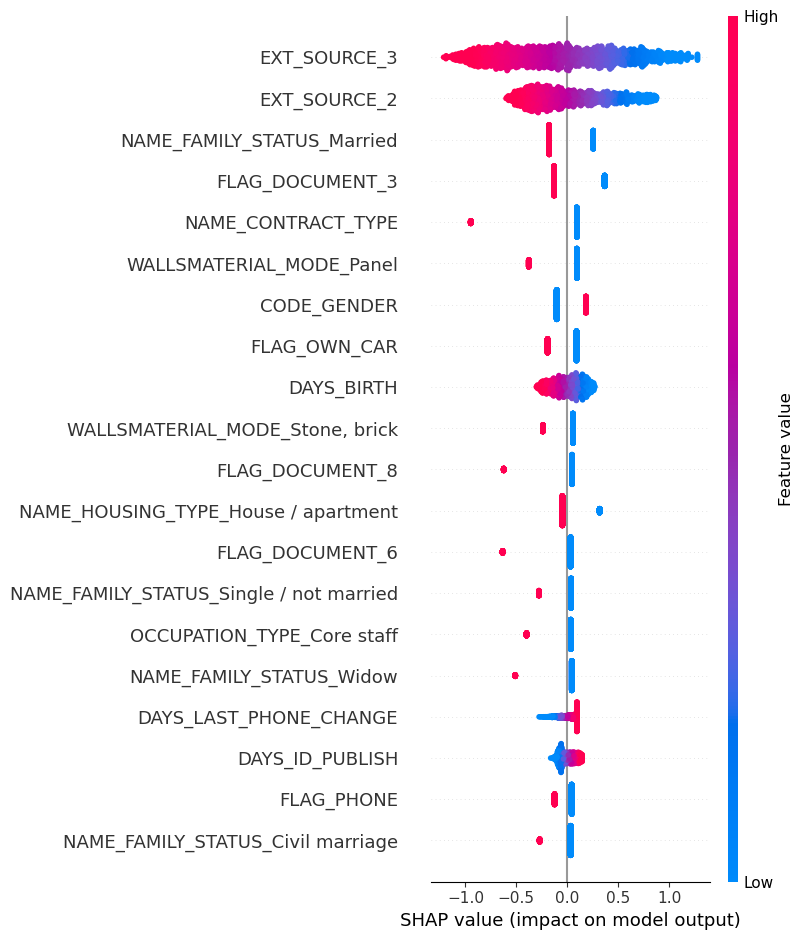

In [17]:
feature_names = X_test_hybrid.columns.tolist()
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, show = False)

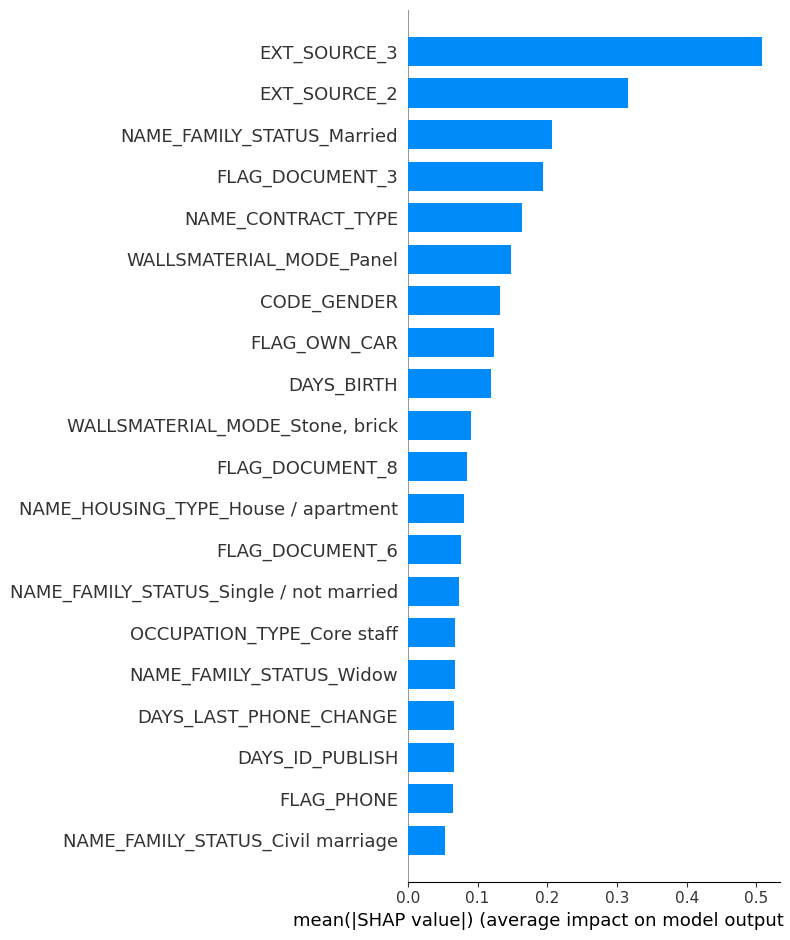

In [18]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=feature_names)

In [19]:
X_train_under = pd.read_csv('X_train_CSV_under.csv')
X_test_under = pd.read_csv('X_test_CSV_under.csv')
y_train_under = pd.read_csv('y_train_CSV_under.csv')
y_test_under = pd.read_csv('y_test_CSV_under.csv')

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test_under)

In [21]:
svm_model = SVC(kernel='linear', cache_size=1000)

In [22]:
start_time = time.time()
svm_model.fit(X_train_scaled, y_train_under)
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps de traitement est de : {execution_time} secondes")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Le temps de traitement est de : 15.254709005355835 secondes


In [23]:
y_pred_under = svm_model.predict(X_test_scaled)

In [24]:
custom_penalty(y_test_under, y_pred_under)

0.18965

In [25]:
from sklearn import metrics
print("RMSE : %.2f" % np.sqrt(metrics.mean_squared_error(y_test_under, y_pred_under)))

RMSE : 0.56


In [26]:
fpr, tpr, thresholds = roc_curve(y_test_under, y_pred_under)
auc_score_under = roc_auc_score(y_test_under, y_pred_under)
auc_score_under

0.6835094570640888